In [3]:
from data_config import EXTRACTED_FOLDER, CLASSES, PALETTE
import os
import pandas as pd
import numpy as np

# Define directory paths and classes and colors
data_directory = EXTRACTED_FOLDER
classes = CLASSES
palette = PALETTE

# Define the paths to the annotation and image output directories
ann_dir = os.path.join(data_directory, "labels")
img_dir = os.path.join(data_directory, "images")

In [8]:
# load label file and check the unique number of classes
# label files end with .regions.txt
label_files = [f for f in os.listdir(ann_dir) if f.endswith(".regions.txt")]
# choose label file to load
filename = label_files[1]
print("Loading label file: {}".format(filename))
seg_map = np.loadtxt(os.path.join(ann_dir, filename)).astype(np.uint8)

Loading label file: 0000051.regions.txt


In [23]:
# unique values and their counts
unique, counts = np.unique(seg_map, return_counts=True)
# create a dataframe with the unique values and their counts
df = pd.DataFrame({"unique": unique, "counts": counts})

In [10]:
df

,unique,counts
0,0,34211
1,1,11944
2,2,11637
3,4,17637
4,7,1356
5,255,15


In [26]:
from PIL import Image
seg_img = Image.fromarray(seg_map).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))

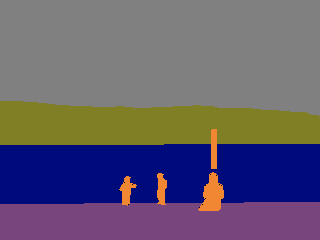

In [27]:
seg_img

In [21]:
seg_img.palette.getdata()

('RGB', b'\x80\x80\x80\x81\x7f&xE}5}"\x00\x0b{v\x14\x0czQ\x19\xf1\x863')

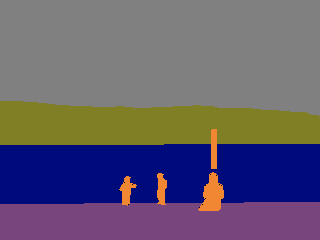

In [22]:
seg_img